In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 4 Basic Visualizations

Load in each data file:

In [3]:
data = np.loadtxt('data/data.txt', skiprows=0, delimiter='\t', dtype='int')
test = np.loadtxt('data/test.txt', skiprows=0, delimiter='\t', dtype='int')
train = np.loadtxt('data/train.txt', skiprows=0, delimiter='\t', dtype='int')
movies = np.loadtxt('data/movies.txt', skiprows=0, delimiter='\t', dtype='str')

### 1

Create a histogram of all the ratings in the dataset. First, put all the ratings into a list and then plot. 

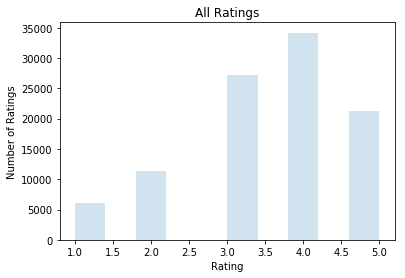

In [12]:
ratings = []
for element in data:
    ratings.append(int(element[2]))

plt.hist(ratings, normed=False, histtype='stepfilled', alpha=0.2, label='ratings')
plt.title('All Ratings')
plt.ylabel('Number of Ratings')
plt.xlabel('Rating')

plt.show()

### 2

First, we will determine the 10 most popular movies. To do this, we will go through the data dataset and determine the number of ratings that each movie has received

In [5]:
totalRatings = {}
for element in data:
    if element[1] in totalRatings:
        totalRatings[element[1]] += 1
    else:
        totalRatings[element[1]] = 1

Now, convert the dictionary to a list and sort by the number of ratings:

In [6]:
ratingList = []

for item in totalRatings.items():
    ratingList.append(item)
    
ratingList.sort(key=lambda x: x[1], reverse=True)

Print out the 10 most popular movies:

In [7]:
ratingList[:10]

[(50, 583),
 (258, 509),
 (100, 508),
 (181, 507),
 (294, 485),
 (286, 481),
 (288, 478),
 (1, 452),
 (300, 431),
 (121, 429)]

Create a dictionary for the ten most popular movies, find all the ratings, and plot as a histogram:

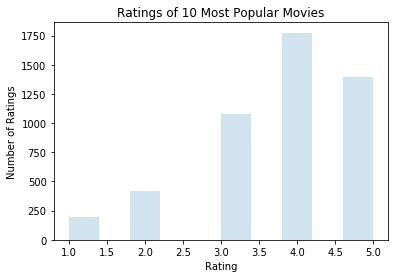

In [11]:
popular = {}
for item in ratingList[:10]:
    popular[item[0]] = True
    
popularRatings = []
for element in data:
    if element[1] in popular:
        popularRatings.append(int(element[2]))

plt.hist(popularRatings, normed=False, histtype='stepfilled', alpha=0.2, label='ratings')
plt.title('Ratings of 10 Most Popular Movies')
plt.ylabel('Number of Ratings')
plt.xlabel('Rating')
plt.show()

### 3

Find the average ratings of each movie and sort a list by the best rated:

In [14]:
avgRatings = {}
for element in data:
    if element[1] in avgRatings:
        avgRatings[element[1]][0] += int(element[2])
        avgRatings[element[1]][1] += 1
    else:
        avgRatings[element[1]] = [int(element[2]), 1]

        
avgRatingList = []

for key, value in avgRatings.items():
    avgRatingList.append((key, value[0] / float(value[1])))
    
avgRatingList.sort(key=lambda x: x[1], reverse=True)

Print out the 10 best rated movies:

In [9]:
avgRatingList[:10]

[(1189, 5.0),
 (1500, 5.0),
 (814, 5.0),
 (1536, 5.0),
 (1293, 5.0),
 (1599, 5.0),
 (1653, 5.0),
 (1467, 5.0),
 (1122, 5.0),
 (1201, 5.0)]

Create a dictionary for the ten best rated movies, find all the ratings, and plot as a histogram:

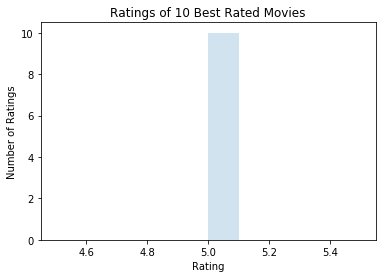

In [15]:
best = {}
for item in avgRatingList[:10]:
    best[item[0]] = True
    
bestRatings = []
for element in data:
    if element[1] in best:
        bestRatings.append(int(element[2]))

plt.hist(bestRatings, normed=True, histtype='stepfilled', alpha=0.2, label='ratings')
plt.title('Ratings of 10 Best Rated Movies')
plt.ylabel('Number of Ratings')
plt.xlabel('Rating')
plt.show()

### 4

We choose to do the genres Comedy, Western, and Romance.

In [11]:
print(movies[0])

['1' 'Toy Story (1995)' '0' '0' '0' '1' '1' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0']


Find all the movies that are comedy, western, and/or romance:

In [16]:
genres = {'Comedy':[], 'Western':[], 'Animation':[]}
for movie in movies:
    if movie[7] == '1':
        genres['Comedy'].append(int(movie[0]))
    if movie[20] == '1':
        genres['Western'].append(int(movie[0]))
    if movie[16] == '1':
        genres['Animation'].append(int(movie[0]))

For the movies in each category, find all the ratings and plot a histogram:

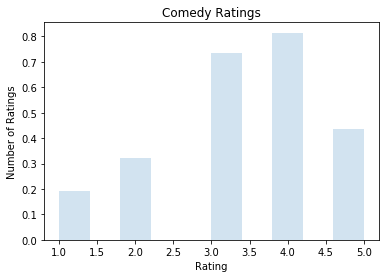

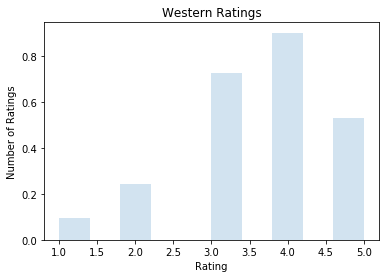

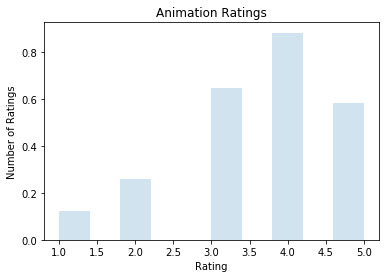

In [17]:
for genre in genres.keys():
    genre_ratings = []
    temp = genres[genre]
    for element in data:
        if element[1] in temp:
            genre_ratings.append(int(element[2]))
    title = genre + ' Ratings'
    plt.hist(genre_ratings, normed=True, histtype='stepfilled', alpha=0.2, label='ratings')
    plt.title(title)
    plt.ylabel('Number of Ratings')
    plt.xlabel('Rating')
    plt.show()